## Cross-validation

We can find multiple definitions as to what cross-validation is. 
<br>


Mine is a one-liner:<br>
**Cross-validation is a step in the process of building a machine learning model which
helps us ensure that our models fit the data accurately and also ensures that we do
not overfit.**

To explain overfitting, I think it’s best if we look at a dataset. There is a red winequality
dataset2 which is quite famous. This dataset has 11 different attributes that
decide the quality of red wine.

In [2]:
import pandas as pd
df = pd.read_csv("../winequality-red.csv")

In [3]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
set(df.quality)

{3, 4, 5, 6, 7, 8}

In [5]:
# a mapping dictionary that maps the quality values from 0 to 5
quality_mapping = {
3: 0,
4: 1,
5: 2,
6: 3,
7: 4,
8: 5
}
# you can use the map function of pandas with
# any dictionary to convert the values in a given
# column to values in the dictionary
df.loc[:, "quality"] = df.quality.map(quality_mapping)

In [6]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,2
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,2
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,2
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,3
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,3
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,2


In [7]:
set(df.quality)

{0, 1, 2, 3, 4, 5}

Before we begin to understand what overfitting is, let’s divide the data into two
parts. This dataset has 1599 samples. We keep 1000 samples for training and 599
as a separate set.

Splitting can be done easily by the following chunk of code:

In [9]:
# use sample with frac=1 to shuffle the dataframe
# we reset the indices since they change after
# shuffling the dataframe
df = df.sample(frac=1).reset_index(drop=True)
# top 1000 rows are selected
# for training
df_train = df.head(1000)
# bottom 599 values are selected
# for testing/validation
df_test = df.tail(599)

We will now train a decision tree model on the training set. For the decision tree
model, I am going to use scikit-learn.

In [10]:
# import from scikit-learn
from sklearn import tree
from sklearn import metrics
# initialize decision tree classifier class
# with a max_depth of 3
clf = tree.DecisionTreeClassifier(max_depth=3)
# choose the columns you want to train on
# these are the features for the model
cols = ['fixed acidity',
'volatile acidity',
'citric acid',
'residual sugar',
'chlorides',
'free sulfur dioxide',
'total sulfur dioxide',
'density',
'pH',
'sulphates',
'alcohol']
# train the model on the provided features
# and mapped quality from before
clf.fit(df_train[cols], df_train.quality)

DecisionTreeClassifier(max_depth=3)

Note that I have used a max_depth of 3 for the decision tree classifier. I have left
all other parameters of this model to its default value.

Now, we test the accuracy of this model on the training set and the test set:

In [11]:
# generate predictions on the training set
train_predictions = clf.predict(df_train[cols])
# generate predictions on the test set
test_predictions = clf.predict(df_test[cols])
# calculate the accuracy of predictions on
# training data set
train_accuracy = metrics.accuracy_score(
df_train.quality, train_predictions
)
# calculate the accuracy of predictions on
# test data set
test_accuracy = metrics.accuracy_score(
df_test.quality, test_predictions
)

In [13]:
print("The Training Accuracy:", train_accuracy)
print("The Testing Accuracy:", test_accuracy)

The Training Accuracy: 0.589
The Testing Accuracy: 0.5425709515859767


The training and test accuracies are found to be 58.9% and 54.25%.

**Now we
increase the max_depth to 7 and repeat the process.**

In [15]:
# import from scikit-learn
from sklearn import tree
from sklearn import metrics
# initialize decision tree classifier class
# with a max_depth of 3
clf = tree.DecisionTreeClassifier(max_depth=3)
# choose the columns you want to train on
# these are the features for the model
cols = ['fixed acidity',
'volatile acidity',
'citric acid',
'residual sugar',
'chlorides',
'free sulfur dioxide',
'total sulfur dioxide',
'density',
'pH',
'sulphates',
'alcohol']
# train the model on the provided features
# and mapped quality from before
clf.fit(df_train[cols], df_train.quality)




# generate predictions on the training set
train_predictions = clf.predict(df_train[cols])
# generate predictions on the test set
test_predictions = clf.predict(df_test[cols])
# calculate the accuracy of predictions on
# training data set
train_accuracy = metrics.accuracy_score(
df_train.quality, train_predictions
)
# calculate the accuracy of predictions on
# test data set
test_accuracy = metrics.accuracy_score(
df_test.quality, test_predictions
)

In [16]:
print("The Training Accuracy:", train_accuracy)
print("The Testing Accuracy:", test_accuracy)

The Training Accuracy: 0.589
The Testing Accuracy: 0.5425709515859767


Here, we have used accuracy, mainly because it
is the most straightforward metric. It might not be the best metric for this problem.

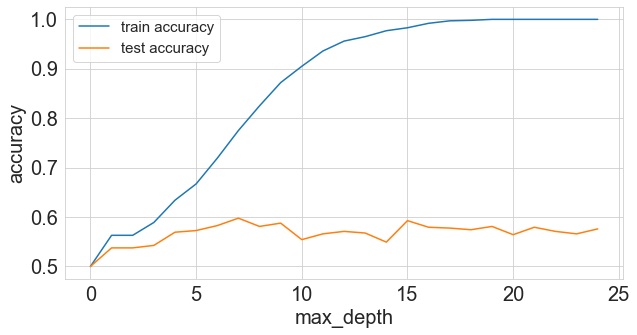

In [17]:
# import scikit-learn tree and metrics
from sklearn import tree
from sklearn import metrics
# import matplotlib and seaborn
# for plotting
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
# this is our global size of label text
# on the plots
matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)
# This line ensures that the plot is displayed
# inside the notebook
%matplotlib inline
# initialize lists to store accuracies
# for training and test data
# we start with 50% accuracy
train_accuracies = [0.5]
test_accuracies = [0.5]
# iterate over a few depth values
for depth in range(1, 25):
    # init the model
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    # columns/features for training
    # note that, this can be done outside
    # the loop
    cols = [
    'fixed acidity',
    'volatile acidity',
    'citric acid',
    'residual sugar',
    'chlorides',
    'free sulfur dioxide',
    'total sulfur dioxide',
    'density',
    'pH',
    'sulphates',
    'alcohol'
    ]
    # fit the model on given features
    clf.fit(df_train[cols], df_train.quality)
    # create training & test predictions
    train_predictions = clf.predict(df_train[cols])
    test_predictions = clf.predict(df_test[cols])
    # calculate training & test accuracies
    train_accuracy = metrics.accuracy_score(
    df_train.quality, train_predictions
    )
    test_accuracy = metrics.accuracy_score(
    df_test.quality, test_predictions
    )
    # append accuracies
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
# create two plots using matplotlib
# and seaborn
plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")
plt.plot(train_accuracies, label="train accuracy")
plt.plot(test_accuracies, label="test accuracy")
plt.legend(loc="upper left", prop={'size': 15})
plt.xticks(range(0, 26, 5))
plt.xlabel("max_depth", size=20)
plt.ylabel("accuracy", size=20)
plt.show()

We see that the best score for test data is obtained when max_depth has a value of 14. <br>
As we keep increasing the value of this parameter, test accuracy remains the
same or gets worse, but the training accuracy keeps increasing.  <br>
It means that our
simple decision tree model keeps learning about the training data better and better
with an increase in max_depth, but the performance on test data does not improve
at all.

**This is called overfitting.**

The model fits perfectly on the training set and performs poorly when it comes to
the test set. This means that the model will learn the training data well but will not
generalize on unseen samples. In the dataset above, one can build a model with very
high max_depth which will have outstanding results on training data, but that kind
of model is not useful as it will not provide a similar result on the real-world samples
or live data.

One might argue that this approach isn’t overfitting as the accuracy of the test set
more or less remains the same. Another definition of overfitting would be when the
test loss increases as we keep improving training loss. This is very common when
it comes to neural networks.

Whenever we train a neural network, we must monitor loss during the training time
for both training and test set. If we have a very large network for a dataset which is
quite small (i.e. very less number of samples), we will observe that the loss for both
training and test set will decrease as we keep training. However, at some point, test
loss will reach its minima, and after that, it will start increasing even though training
loss decreases further. **We must stop training where the validation loss reaches its
minimum value.**

***This is the most common explanation of overfitting.***